# Part C - K-means, DBSCA, Agglomerative Clustering

In [29]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

## Load and Visualize datasets

In [12]:
def plot_datset(X, y, title):
    f0 = [X[i][0] for i in range(len(X))]  # feature 1
    f1 = [X[i][1] for i in range(len(X))]  # feature 2
    Cluster = y

    fig = plt.figure()
    ax = fig.add_subplot(111)

    scatter = ax.scatter(f0, f1, c=Cluster, s=40)
    plt.title(title)
    plt.xlabel("feature 0")
    plt.ylabel("feature 1")

    plt.show()

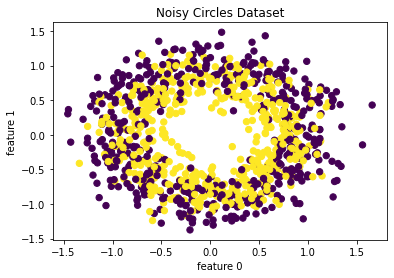

In [18]:
X_circle, y_circle = make_circles(n_samples=1000, shuffle=True, noise=0.2, random_state=0,factor=0.8)
plot_datset(X_circle, y_circle, "Noisy Circles Dataset")

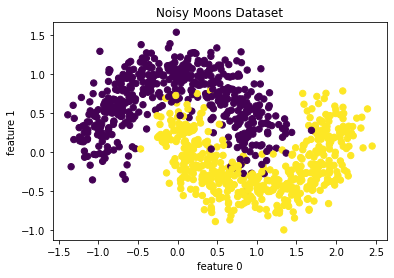

In [19]:
X_moon, y_moon = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=0)
plot_datset(X_moon, y_moon, "Noisy Moons Dataset")

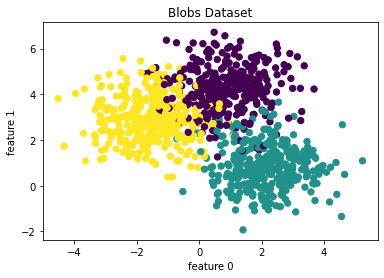

In [20]:
X_blob, y_blob = make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, shuffle=True,random_state=0)
plot_datset(X_blob, y_blob, "Blobs Dataset")

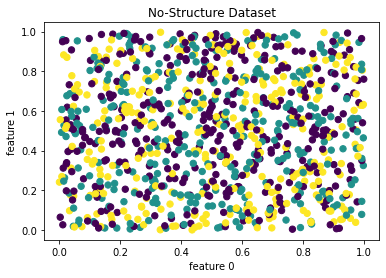

In [27]:
X_fuzzy, y_fuzzy = np.random.rand(1000, 2), np.random.randint(0,3,(1000,1))
plot_datset(X_fuzzy, y_fuzzy, "No-Structure Dataset")

## K-means

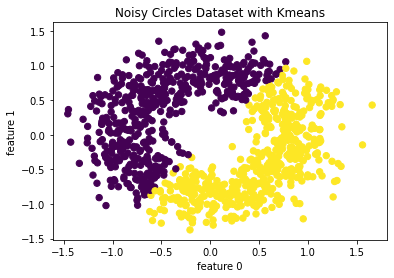

In [23]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_circle)
new_clusters = kmeans.labels_
plot_datset(X_circle, new_clusters, "Noisy Circles Dataset with Kmeans")

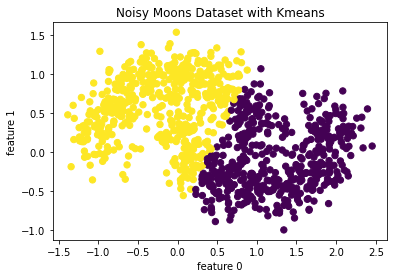

In [24]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_moon)
new_clusters = kmeans.labels_
plot_datset(X_moon, new_clusters, "Noisy Moons Dataset with Kmeans")

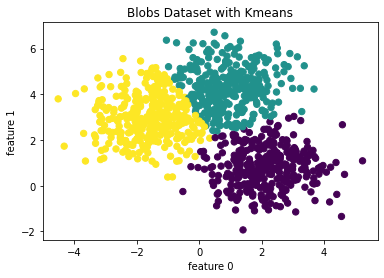

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_blob)
new_clusters = kmeans.labels_
plot_datset(X_blob, new_clusters, "Blobs Dataset with Kmeans")

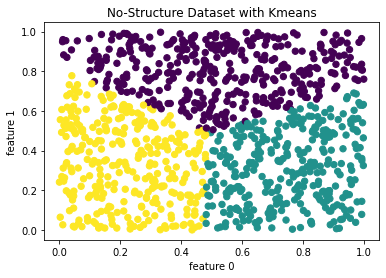

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_fuzzy)
new_clusters = kmeans.labels_
plot_datset(X_fuzzy, new_clusters, "No-Structure Dataset with Kmeans")

## DBSCAN

In [115]:
def dbscan_different_epsilon(X, y):
    MinPts = 5
    epsilon = [0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.28]
    total_new_clusters = []
    for e in epsilon:
        dbscan = DBSCAN(eps=e, min_samples=MinPts).fit(X)
        total_new_clusters.append(dbscan.labels_)

    # calculate v-measure for 10 models with 10 different epsilon values
    v_values = []
    for new_clusters in total_new_clusters:
        v_values.append(v_measure_score(y, new_clusters))
    
    # find best epsilon
    best_index = np.array(v_values).argmax()
    print('best epsilon is:', epsilon[best_index])
    
    # return predicted clusters with best epsilon
    return total_new_clusters[best_index]

best epsilon is: 0.1


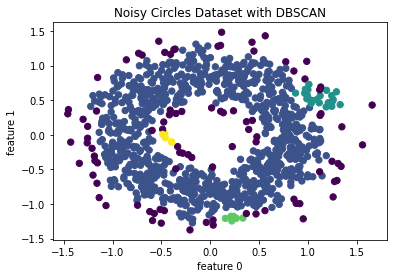

In [116]:
new_clusters = dbscan_different_epsilon(X_circle, y_circle)
plot_datset(X_circle, new_clusters, "Noisy Circles Dataset with DBSCAN")

best epsilon is: 0.08


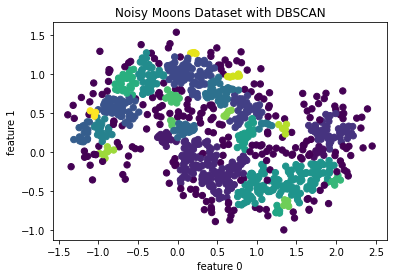

In [117]:
new_clusters = dbscan_different_epsilon(X_moon, y_moon)
plot_datset(X_moon, new_clusters, "Noisy Moons Dataset with DBSCAN")

best epsilon is: 0.28


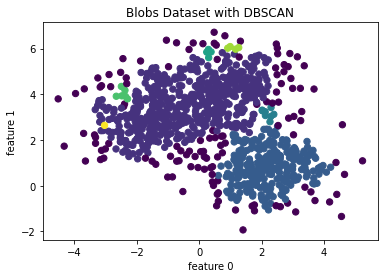

In [118]:
new_clusters = dbscan_different_epsilon(X_blob, y_blob)
plot_datset(X_blob, new_clusters, "Blobs Dataset with DBSCAN")

best epsilon is: 0.04


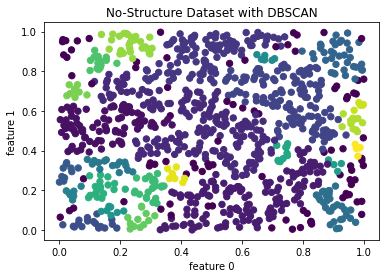

In [119]:
y_fuzzy_1D = [y[0] for y in y_fuzzy]
new_clusters = dbscan_different_epsilon(X_fuzzy, y_fuzzy_1D)
plot_datset(X_fuzzy, new_clusters, "No-Structure Dataset with DBSCAN")

## Agglomerative

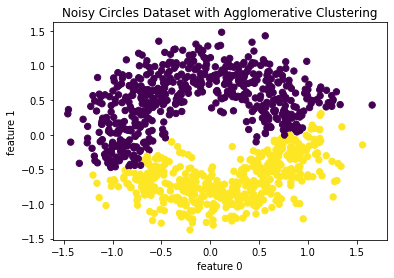

In [34]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X_circle)   # 'ward' minimizes the variance of the clusters being merged
new_clusters = agg_clustering.labels_
plot_datset(X_circle, new_clusters, "Noisy Circles Dataset with Agglomerative Clustering")

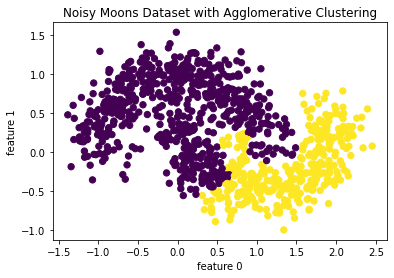

In [37]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X_moon)  
new_clusters = agg_clustering.labels_
plot_datset(X_moon, new_clusters, "Noisy Moons Dataset with Agglomerative Clustering")

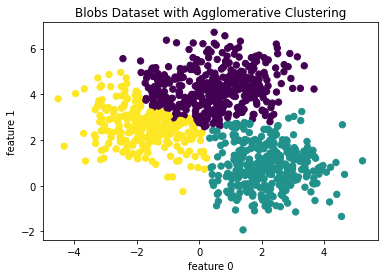

In [38]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_blob)  
new_clusters = agg_clustering.labels_
plot_datset(X_blob, new_clusters, "Blobs Dataset with Agglomerative Clustering")

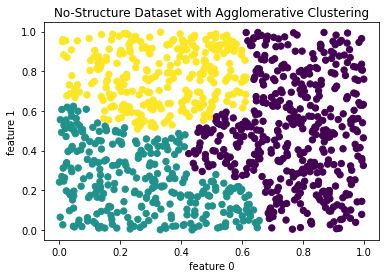

In [41]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_fuzzy)  
new_clusters = agg_clustering.labels_
plot_datset(X_fuzzy, new_clusters, "No-Structure Dataset with Agglomerative Clustering")